# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset

In [3]:
dataset=pd.read_csv('../input/digit-recognizer/train.csv')

In [4]:
dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Data into X_train and Y_train

In [5]:
X_train=np.array(dataset.drop(['label'],axis=1))
Y_train=np.array(dataset['label'])

In [6]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
Y_train

array([1, 0, 1, ..., 7, 6, 9])

# Applying Normalization

In [8]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_train=X_train.astype('float32')
X_train=X_train/255 
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

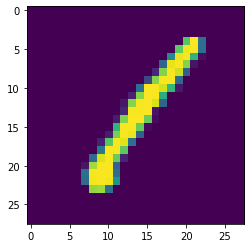

In [9]:
plt.figure()
plt.imshow(X_train[0][:,:,0])

# Building Model

In [10]:
import tensorflow as tf

In [11]:
X_train.shape

(42000, 28, 28, 1)

In [ ]:
# model=tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28, 28, 1)),
#     tf.keras.layers.MaxPooling2D((2,2),strides=2),
#     tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
#     tf.keras.layers.MaxPooling2D((2,2),strides=2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512,activation=tf.nn.relu),
#     tf.keras.layers.Dense(10,activation=tf.nn.softmax)
# ])
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

# Training the model

In [ ]:
model.fit(X_train,Y_train,epochs=15,batch_size=32)

# Using trained model to predict test dataset

In [ ]:
test_df=pd.read_csv('../input/digit-recognizer/test.csv')

In [ ]:
X_test=np.array(test_df)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_test=X_test.astype('float32')

In [ ]:
X_test/=255

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[10])

In [ ]:
plt.figure()
plt.imshow(X_test[10][:,:,0])

In [ ]:
X_test.shape

In [ ]:
predictions.shape

In [ ]:
results=[]

In [ ]:
for i in range(28000):
    results.append(np.argmax(predictions[i]))
    

In [ ]:
results[4]

In [ ]:
results=pd.Series(results,name="Label")

In [ ]:
results

In [ ]:
submission=pd.concat([pd.Series(range(1,28001),name="ImageId"),results],axis=1)

In [ ]:
submission

# Making Submission

In [ ]:
submission.to_csv('My_submissions3',index=False)

In [ ]:
my_sub=pd.read_csv('My_submissions3')

In [ ]:
my_sub